# DATA620 - Week 8 Assignment: High Frequency Words


## Prompt:
Please answer the following questions in an IPython Notebook, posted to GitHub.
- Choose a corpus of interest.
-  How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,defensible way).
- Taking the most common words, how many unique words represent half of the total words in the corpus?
- Identify the 200 highest frequency words in this corpus.
- Create a graph that shows the relative frequency of these 200 words.
- Does the observed relative frequency of these words follow Zipf’s law? Explain.
- In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

# Installing Packages

In [16]:
import nltk
import pandas as pd
import seaborn as sns
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import string
from collections import Counter
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


# Loading Dataset

In [17]:
print(gutenberg.fileids())

for file_id in gutenberg.fileids():
    if 'milton-paradise.txt' in file_id:
        print(file_id)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
milton-paradise.txt


From the nltk package, I chose to work with Jane Austen's "Persuasion". "Persuasion" was Austen's final completed novel, published in 1818. It is about a character in her 30s, Anne Elliot, who lives in regret due to breaking off an engagement with Frederick Wentworth. One day they meet again and Anne is forced to navigate her feelings, social status, and personal growth. This book is a classic.

# Total Unique Words

In [18]:
persuasion_words = gutenberg.words('austen-persuasion.txt') #load txt

def preprocess_word(word): #cleaning
    word = word.lower()
    word = word.strip(string.punctuation)
    return word

cleaned_words = [preprocess_word(word) for word in persuasion_words if word.isalpha()]

unique_words = set(cleaned_words)

total_unique_words = len(unique_words)
print("Total unique words in 'Persuasion':", total_unique_words)

Total unique words in 'Persuasion': 5739


After cleaning and preprocessing, there are a total of 5739 unique words in Austen's "Persuasion".

# Unique Words Representing Half of the Text

In [19]:
word_freq = Counter(persuasion_words) #word freq

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True) #freq in descending order

total_words = sum(word_freq.values())

cumulative_count = 0
unique_word_count = 0

for word, freq in sorted_word_freq: # Iterate over the sorted word-frequency pairs to find # unique words representing half of the total text
    cumulative_count += freq
    unique_word_count += 1
    if cumulative_count >= total_words / 2:
        break

print("Number of unique words representing half of the total words in the corpus:", unique_word_count)

Number of unique words representing half of the total words in the corpus: 50


Here, we are finding the number of unique words that represent half of the total words in the corpus. We can use this method to identify the richness of the text's vocabulary. Finding the number of unique words that make up half of the corpus can allow us to understand the level of diversity in the text's vocabulary relative to the total number of words. In this case, there are only 50 unique words meaning that there is a small number of unique words making up a large proportion of the total words. This suggests less diverse vocabulary.

# Top 200 Words

In [20]:
freq_dist = FreqDist(cleaned_words)
top_200_words = freq_dist.most_common(200)
df_top_words = pd.DataFrame(top_200_words, columns=['Word', 'Frequency'])
df_top_words.head()

,Word,Frequency
0,the,3329
1,to,2808
2,and,2801
3,of,2570
4,a,1595


Here, I have created a dataframe for the top 200 words in "Persuasion". We can see that "the" had the highest frequency, being used 3,329 times.

# Data Visualization

## Top 200 Words

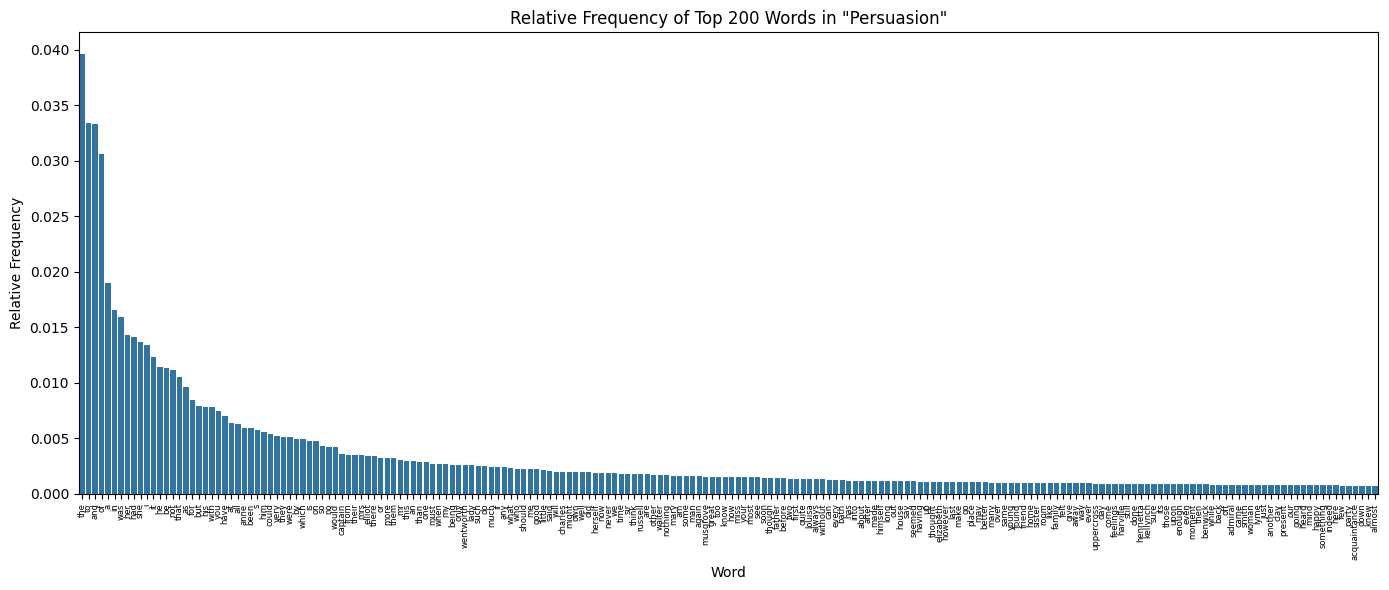

In [21]:
total_words = len(cleaned_words)

df_top_words['Relative Frequency'] = df_top_words['Frequency'] / total_words

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top_words.head(200), x='Word', y='Relative Frequency')

plt.xlabel('Word')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Top 200 Words in "Persuasion"')

plt.xticks(rotation=90, fontsize=6)

plt.tight_layout()
plt.show()

The figure above depicts the freqency of the top 200 words relative to one another in the text. We can see that it looks similar to a graph of exponential decay.

# Zipf's Law

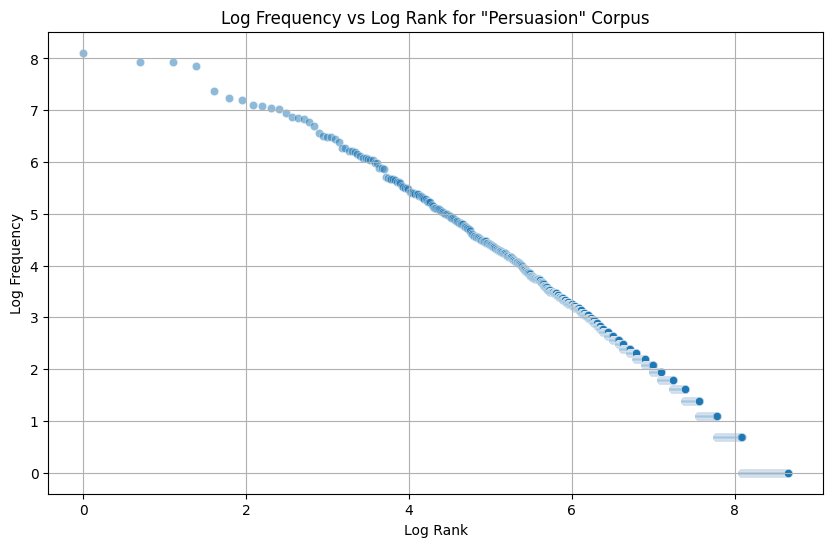

In [24]:
word_freq_sorted['Rank'] = range(1, len(word_freq_sorted) + 1)

word_freq_sorted['Log Frequency'] = np.log(word_freq_sorted['Frequency'])#log frequency and log rank
word_freq_sorted['Log Rank'] = np.log(word_freq_sorted['Rank'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=word_freq_sorted, x='Log Rank', y='Log Frequency', alpha=0.5)
plt.title('Log Frequency vs Log Rank for "Persuasion" Corpus')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')

plt.grid(True)
plt.show()

Zipf's law states that in a frequency list, the frequency of a word is  inversely proportional to its rank in that list. To verify this with a graph, I plotted the log frequency of words versus their log rank. Using the log of each allwos us to efffectively evaluate the relationship between the two. Since the trend has a negative slope, it suggests that the data follows Zipf's law.

# Comparing "Persuasion" Word Frequency to all Others

The frequency of words in the "Persuasion" corpus may differ from the frequency across all corpora in a number of ways. For example, other texts may have a stronger or more diverse vocabulary. The context is also important, especially considering that this book was written in the 19th century. The time period, its themes, and the fact that it was written by a female author, definitely contribute to the vocabulary of the book. Jane Austen's writing style may help to further distinguish the word frequency in "Persuasion" from the other texts. Analyzing differences allows us to think about these various contextual factors that we may not have thought about before. With that being said, I do expect for most, if not all, of the texts to contain similar words when looking at the top 200 words.


### Presentation Link